# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
import tensorflow as tf
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.models import Sequential,load_model
from tensorflow.keras.utils import to_categorical
import joblib

# Import Dataset

In [5]:
df = pd.read_csv("D:\\Programming\\Machine Learning\\Projects\\Digit Recognizer\\train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
side = int(np.sqrt(df.shape[1]-1))
side

28

# Represent Digits

In [7]:
def imshow(df):
    nrows = ncols = 5
    fig,ax = plt.subplots(nrows,ncols,figsize=(16,16))
    ax = ax.flatten()
    for i in range(nrows * ncols):
        ax[i].imshow(df.iloc[i, 1:].values.reshape(side, side), cmap='gray')
        ax[i].set_title(f"Digit: {df.iloc[i, 0]}", fontsize=20)
        ax[i].axis('off')

    plt.show()

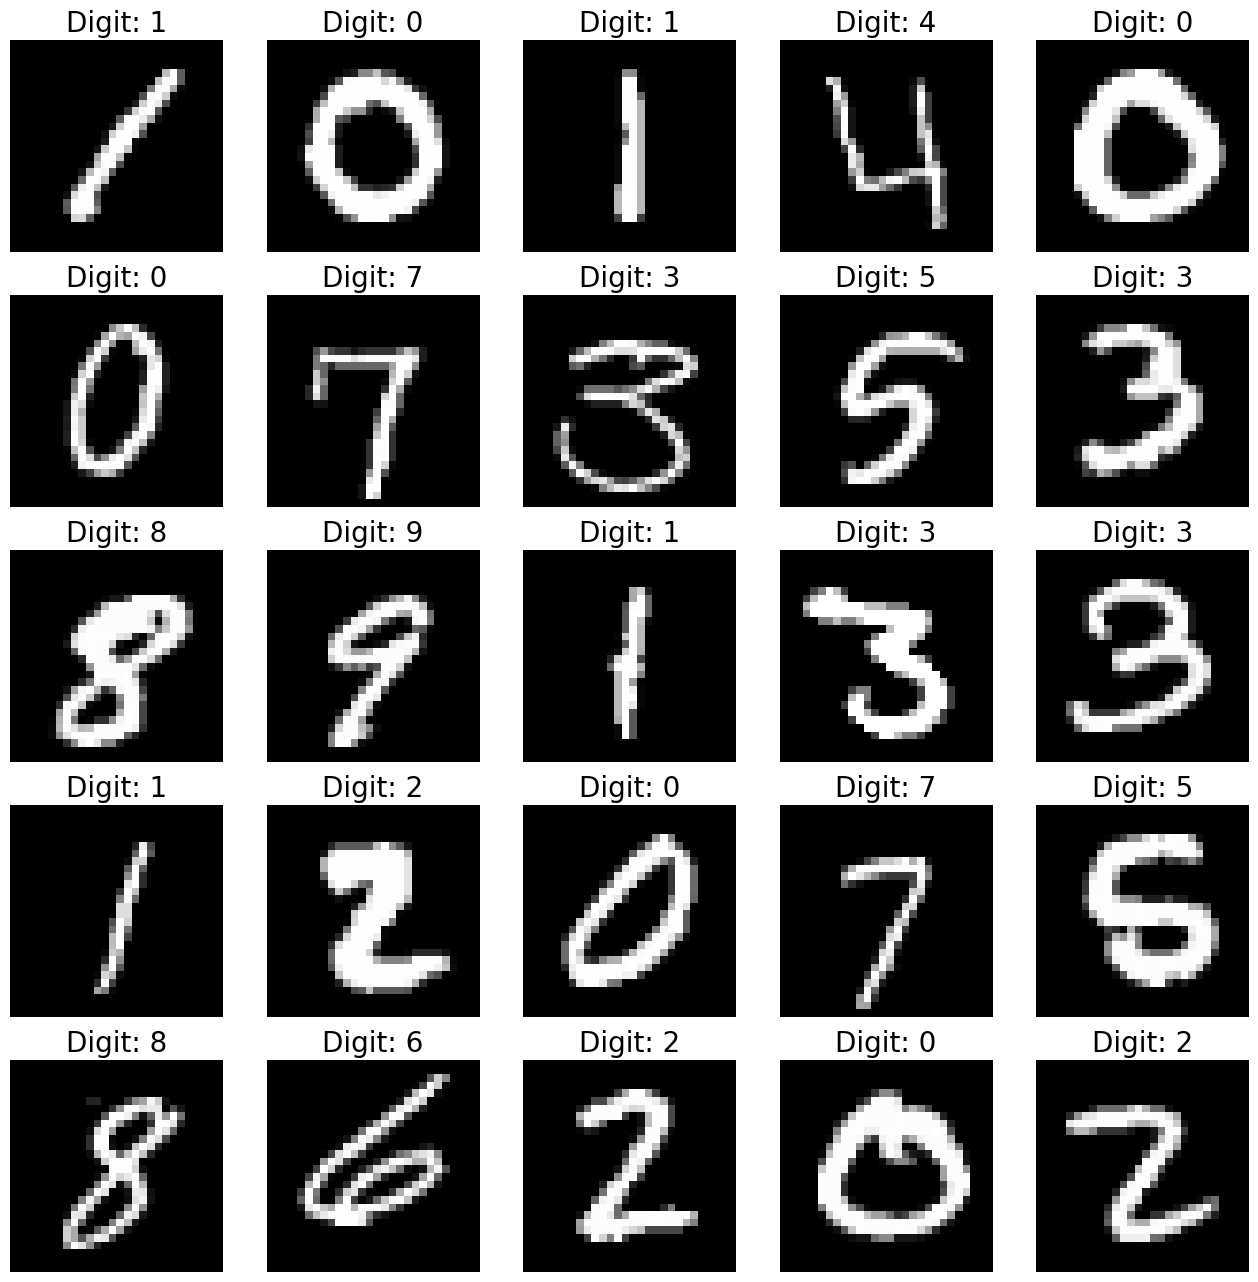

In [8]:
imshow(df)

# Data Preperation

In [9]:
X,y = df.iloc[:,1:].values, df.iloc[:,0].values

In [10]:
X.shape,y.shape

((42000, 784), (42000,))

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Machine Leraning Implementation 

In [12]:
accuracy_of_models = {}

# 1. KNN Classifier

In [13]:
knc = KNeighborsClassifier(n_neighbors=10)

#Traing the model
knc.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [14]:
#make predictions
ypred_knc = knc.predict(X_test)
accuracy_knc = accuracy_score(y_test,ypred_knc)
accuracy_of_models["KNN Classifier"] = accuracy_knc
print("Accuracy = ",accuracy_knc)

Accuracy =  0.9651190476190477


# 2. Decision Tree Classifier 

In [15]:
dt_clf = DecisionTreeClassifier()

In [15]:
params = {"criterion":["gini", "entropy"]}

gsearch = GridSearchCV(estimator=dt_clf,param_grid=params,cv=5)
gsearch.fit(X_train,y_train)

gsearch.best_params_

{'criterion': 'entropy'}

In [16]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [17]:
#make predictions
ypred_clf = clf.predict(X_test)
accuracy_clf = accuracy_score(y_test,ypred_clf)
accuracy_of_models["DecisionTree Classifier"] = accuracy_clf
print("Accuracy = ",accuracy_clf)

Accuracy =  0.8609523809523809


# 3. Random Forest Classifier

In [ ]:
params = {"n_estimators":[100,200,300,400], "criterion":["gini", "entropy"]}
gsearch = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,cv=5)
gsearch.fit(X_train,y_train)
gsearch.best_params_

In [18]:
rf = RandomForestClassifier(n_estimators=400 ,criterion="gini")
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=400)

In [19]:
#make predictions
ypred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test,ypred_rf)
accuracy_of_models["Random Forest Classifier"] = accuracy_rf
print("Accuracy = ",accuracy_rf)

Accuracy =  0.965952380952381


# 4. Support Vector Classifier

In [ ]:
params = {"C":[0.5,1.0], "kernel":['linear', 'poly', 'rbf']}

gsearch = GridSearchCV(estimator=SVC(), param_grid=params,cv=5)
gsearch.fit(X_train,y_train)

gsearch.best_params_

In [20]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [21]:
ypred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test,ypred_svc)
accuracy_of_models["Support Vector Classifier"] = accuracy_svc
print("Accuracy = ",accuracy_svc)

Accuracy =  0.9747619047619047


In [22]:
pd.DataFrame(accuracy_of_models,index=["Accuracy"]).T

,Accuracy
KNN Classifier,0.965119
DecisionTree Classifier,0.860952
Random Forest Classifier,0.965952
Support Vector Classifier,0.974762


# Save the Best ML Model

In [25]:
joblib.dump(svc, 'best_model.pkl')

['best_model.pkl']

# Deep Learning Implementation

# Data Preperation by Normalization 

In [36]:
data = df
X,y = data.iloc[:,1:].values,data.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [41]:
# Normalize and reshape the input data
X_train = X_train.reshape(X_train.shape[0], side, side, 1)
X_test = X_test.reshape(X_test.shape[0], side, side, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Building Nueral Network (CNN)

In [43]:
model = Sequential()

#1st convolution layer 
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(side,side,1),activation="relu"))
#1st pooling layer to reduce dimentionalities
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd Convolution layer 
model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
#2nd pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#flateen layer to convert image to array
model.add(Flatten())

#dense layers
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

# Compile the Model

In [44]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

# Train the Model

In [45]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30,verbose=1)

Epoch 1/30
1050/1050 [==============================] - 16s 14ms/step - loss: 0.5050 - accuracy: 0.9301 - val_loss: 0.1126 - val_accuracy: 0.9654
Epoch 2/30
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0766 - accuracy: 0.9771 - val_loss: 0.0883 - val_accuracy: 0.9744
Epoch 3/30
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0565 - accuracy: 0.9821 - val_loss: 0.0707 - val_accuracy: 0.9782
Epoch 4/30
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0452 - accuracy: 0.9859 - val_loss: 0.1018 - val_accuracy: 0.9735
Epoch 5/30
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0407 - accuracy: 0.9873 - val_loss: 0.0670 - val_accuracy: 0.9832
Epoch 6/30
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0342 - accuracy: 0.9896 - val_loss: 0.0749 - val_accuracy: 0.9824
Epoch 7/30
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0318 - accuracy: 0.9901 - val_loss: 0.0689 -

# Evaluate the model

In [46]:
accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy: %.2f%%" % (accuracy[1] * 100))

Test accuracy: 98.64%


# Save Nueral Network

In [47]:
model.save('nueral_newtork.h5')

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Load Testing Dataset

In [4]:
data = pd.read_csv("D:\\Programming\\Machine Learning\\Projects\\Digit Recognizer\\test.csv")
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Load ML Model

In [5]:
ml_model = joblib.load("best_model.pkl")

In [6]:
#Make Prediction
y_pred_ml = ml_model.predict(data)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


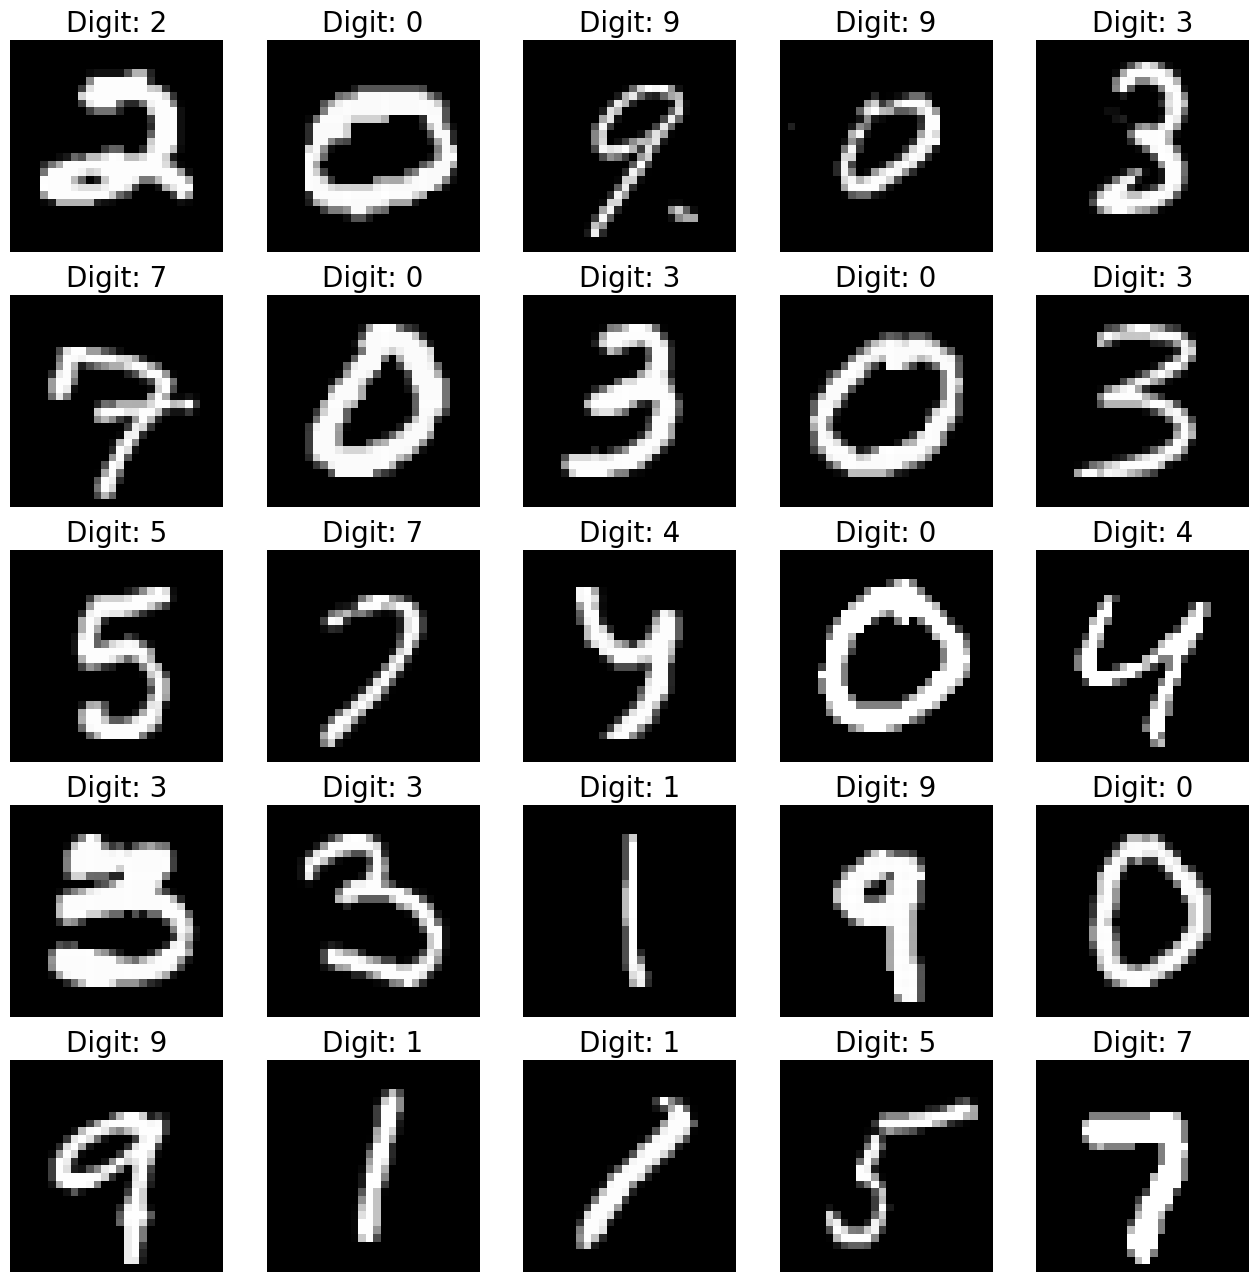

In [8]:
side = 28
nrows = ncols = 5
fig,ax = plt.subplots(nrows,ncols,figsize=(16,16))
ax = ax.flatten()
for i in range(nrows * ncols):
    ax[i].imshow(data.iloc[i,:].values.reshape(side, side), cmap='gray')
    ax[i].set_title(f"Digit: {y_pred_ml[i]}", fontsize=20)
    ax[i].axis('off')

plt.show()

# Load Deep Learning Model

In [9]:
nn = load_model("nueral_newtork.h5")

In [10]:
x = data.values.reshape(data.shape[0],side,side,1)

In [11]:
predictions = nn.predict(x)

875/875 [==============================] - 9s 10ms/step


# Convert Prediction Probabilities to its classes

In [12]:
predicted_classes = np.argmax(predictions, axis=1)

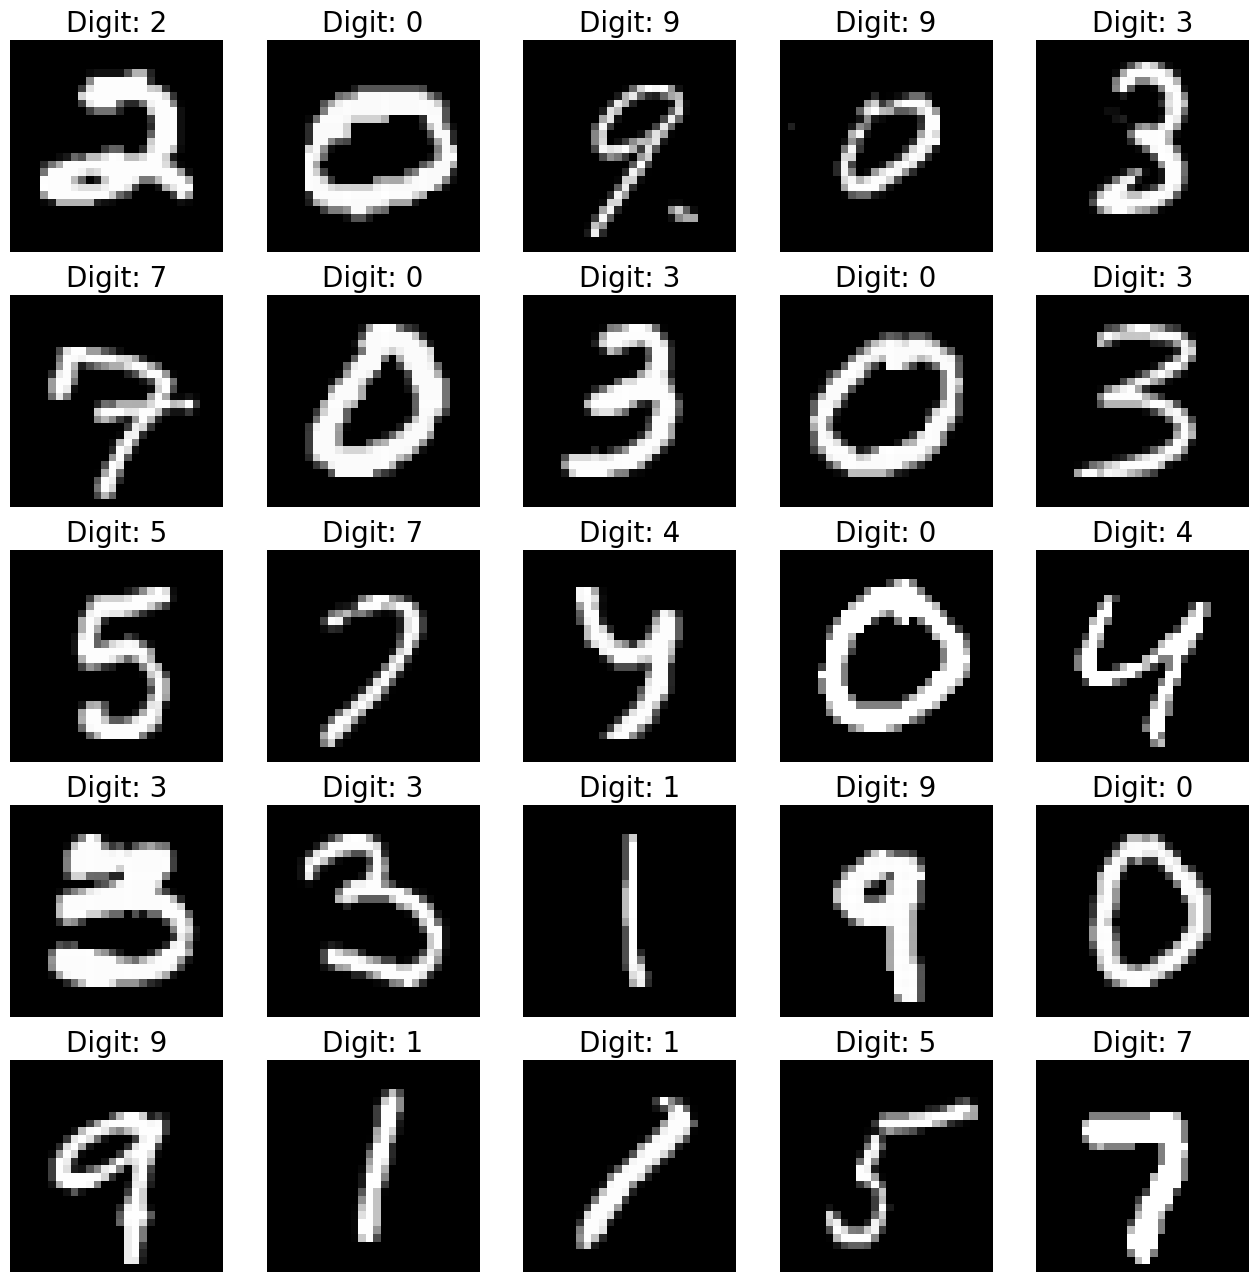

In [13]:
nrows = ncols = 5
fig,ax = plt.subplots(nrows,ncols,figsize=(16,16))
ax = ax.flatten()
for i in range(nrows * ncols):
    ax[i].imshow(data.iloc[i,:].values.reshape(side, side), cmap='gray')
    ax[i].set_title(f"Digit: {predicted_classes[i]}", fontsize=20)
    ax[i].axis('off')

plt.show()